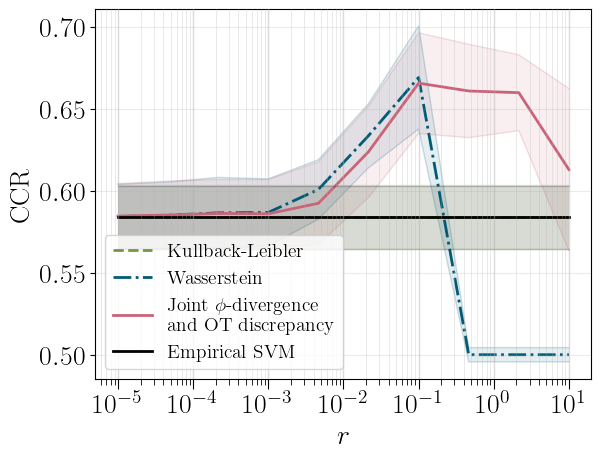

In [1]:
import numpy as np
from utils.plot_utils import plot_results1 as plot_results
import matplotlib.pyplot as plt

replications = 10
p = "inf"
params = {
    'text.usetex': True,
    'font.size': 20,
    'font.family': 'serif', # Matplotlib family name
}
plt.rcParams.update(params)


d = 100

sparsity = 10

N_all = [d]

noise_mag = 0.1

for N in N_all:
    res = np.load("results/20251214_021908_beta_constrained_False_beta_regularized_True_radius_d100_N10000_train200_reps10_nrs10_pinf_noise0.1_spars10_ln0.2_bc0_seed123_ntrain200.npz")

    plot_results(res, d, N, p, replications, name_file="simulation", plot_emp=True, save_format="pdf")



Candidates for ntrain 10 : 1
   results/20251214_163427_big_radius_n_over_dx_beta_constrained_False_beta_regularized_True_radius_d10_N10000_train20_reps10_nrs10_pinf_noise0.1_spars5_ln0.2_bc0_seed123_ntrain10.npz
  Loading: results/20251214_163427_big_radius_n_over_dx_beta_constrained_False_beta_regularized_True_radius_d10_N10000_train20_reps10_nrs10_pinf_noise0.1_spars5_ln0.2_bc0_seed123_ntrain10.npz

Candidates for ntrain 20 : 1
   results/20251214_163427_big_radius_n_over_dx_beta_constrained_False_beta_regularized_True_radius_d10_N10000_train20_reps10_nrs10_pinf_noise0.1_spars5_ln0.2_bc0_seed123_ntrain20.npz
  Loading: results/20251214_163427_big_radius_n_over_dx_beta_constrained_False_beta_regularized_True_radius_d10_N10000_train20_reps10_nrs10_pinf_noise0.1_spars5_ln0.2_bc0_seed123_ntrain20.npz

Candidates for ntrain 30 : 1
   results/20251214_163427_big_radius_n_over_dx_beta_constrained_False_beta_regularized_True_radius_d10_N10000_train20_reps10_nrs10_pinf_noise0.1_spars5_ln0.2

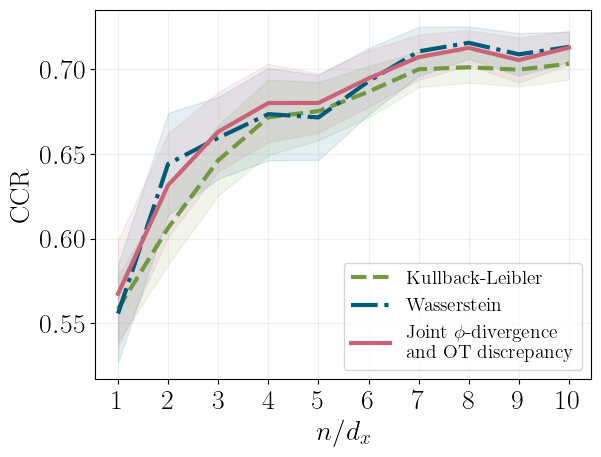

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
params = {
    "text.usetex": True,
    "font.size": 20,
    "font.family": "serif",
}
plt.rcParams.update(params)

d = 10
p = "inf"
noise_mag = 0.1
sparsity = 5
label_noise = 0.2
replications = 10
base_seed = 123
beta_constrained = False

n_train_all = [d, 2*d, 3*d, 4*d, 5*d, 6*d, 7*d, 8*d, 9*d, 10*d]  # adjust if you want

results_dir = "results"
# print("CWD:", os.getcwd())

best_kl, best_wass, best_mot = [], [], []
mot_color = '#CA6378'
wass_color = '#015B76'
kl_color = '#739842'
for n_train in n_train_all:
    pattern = os.path.join(
        results_dir,
        f"*_big_radius_n_over_dx_beta_constrained_{beta_constrained}_beta_regularized_{True}_radius_d{d}_*"
        f"_reps{replications}_*_p{p}_noise{noise_mag}_spars{sparsity}_ln{label_noise}_*_seed{base_seed}_ntrain{n_train}.npz"
    )
    cands = sorted(glob.glob(pattern))
    print("\nCandidates for ntrain", n_train, ":", len(cands))
    for f in cands:
        print("  ", f)

    if len(cands) == 0:
        print("  Missing for this ntrain, skipping")
        continue

    npz_path = cands[-1]
    print("  Loading:", npz_path)

    res = np.load(npz_path, allow_pickle=True)
    best_kl.append(np.max(res["kl_acc"], axis=0))
    best_wass.append(np.max(res["wass_acc"], axis=0))
    best_mot.append(np.max(res["mot_acc"], axis=0))

best_kl = np.array(best_kl)
best_wass = np.array(best_wass)
best_mot = np.array(best_mot)

n_ds = (np.array(n_train_all[:best_kl.shape[0]], dtype=float) / float(d))

def plot_curve(ax, x, y, color, label, linestyle='solid', lw=3):
    mean_ = np.mean(y, axis=1)
    err_ = np.std(y, axis=1) * 0.5
    ax.plot(x, mean_, color=color, linestyle=linestyle, linewidth=lw, label=label)
    ax.fill_between(x, mean_ - err_, mean_ + err_, alpha=0.1, color=color)

fig, ax = plt.subplots(1, 1)
plot_curve(ax, n_ds, best_kl, color=kl_color, linestyle='dashed', label="Kullback-Leibler")
plot_curve(ax, n_ds, best_wass, color=wass_color, linestyle='-.', label="Wasserstein")
plot_curve(ax, n_ds, best_mot, color=mot_color, label="Joint $\phi$-divergence\n and OT discrepancy")

ax.set_xlabel(r"$n/d_x$")
ax.set_ylabel("CCR")
ax.set_xticks(list(n_ds))
ax.grid(True, which="both", alpha=0.2)
ax.legend(fontsize=14)
plt.show()
os.makedirs("figures", exist_ok=True)
out_pdf = os.path.join("figures", "ccr_test_n_over_dx_from_ntrain_files.pdf")
fig.savefig('figure_2c_longer.pdf', bbox_inches="tight")
plt.close(fig)
# print("\nSaved figure:", os.path.abspath(out_pdf))



Candidates for ntrain 10 : 1
   results/20251214_165202__n_over_dx_beta_constrained_False_beta_regularized_True_radius_d10_N10000_train20_reps10_nrs10_pinf_noise0.1_spars5_ln0.0_bc0_seed123_ntrain10.npz
  Loading: results/20251214_165202__n_over_dx_beta_constrained_False_beta_regularized_True_radius_d10_N10000_train20_reps10_nrs10_pinf_noise0.1_spars5_ln0.0_bc0_seed123_ntrain10.npz

Candidates for ntrain 20 : 1
   results/20251214_165202__n_over_dx_beta_constrained_False_beta_regularized_True_radius_d10_N10000_train20_reps10_nrs10_pinf_noise0.1_spars5_ln0.0_bc0_seed123_ntrain20.npz
  Loading: results/20251214_165202__n_over_dx_beta_constrained_False_beta_regularized_True_radius_d10_N10000_train20_reps10_nrs10_pinf_noise0.1_spars5_ln0.0_bc0_seed123_ntrain20.npz

Candidates for ntrain 30 : 1
   results/20251214_165202__n_over_dx_beta_constrained_False_beta_regularized_True_radius_d10_N10000_train20_reps10_nrs10_pinf_noise0.1_spars5_ln0.0_bc0_seed123_ntrain30.npz
  Loading: results/20251

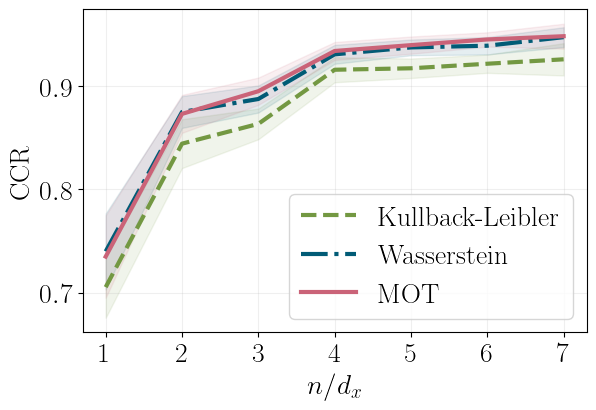

In [3]:
"""
NO NOISE SETTING
"""

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
params = {
    "text.usetex": True,
    "font.size": 20,
    "font.family": "serif",
}
plt.rcParams.update(params)

d = 10
p = "inf"
noise_mag = 0.1
sparsity = 5
label_noise = 0.0
replications = 10
base_seed = 123
beta_constrained = False

n_train_all = [d, 2*d, 3*d, 4*d, 5*d, 6*d, 7*d]#, 8*d]#$, 9*d, 10*d]  # adjust if you want

results_dir = "results"
# print("CWD:", os.getcwd())

best_kl, best_wass, best_mot = [], [], []
mot_color = '#CA6378'
wass_color = '#015B76'
kl_color = '#739842'
for n_train in n_train_all:
    pattern = os.path.join(
        results_dir,
        f"*_n_over_dx_beta_constrained_{beta_constrained}_beta_regularized_{True}_radius_d{d}_*"
        f"_reps{replications}_*_p{p}_noise{noise_mag}_spars{sparsity}_ln{label_noise}_*_seed{base_seed}_ntrain{n_train}.npz"
    )
    cands = sorted(glob.glob(pattern))
    print("\nCandidates for ntrain", n_train, ":", len(cands))
    for f in cands:
        print("  ", f)

    if len(cands) == 0:
        print("  Missing for this ntrain, skipping")
        continue

    npz_path = cands[-1]
    print("  Loading:", npz_path)

    res = np.load(npz_path, allow_pickle=True)
    best_kl.append(np.max(res["kl_acc"], axis=0))
    best_wass.append(np.max(res["wass_acc"], axis=0))
    best_mot.append(np.max(res["mot_acc"], axis=0))

best_kl = np.array(best_kl)
best_wass = np.array(best_wass)
best_mot = np.array(best_mot)

n_ds = (np.array(n_train_all[:best_kl.shape[0]], dtype=float) / float(d))

def plot_curve(ax, x, y, color, label, linestyle='solid', lw=3):
    mean_ = np.mean(y, axis=1)
    err_ = np.std(y, axis=1) * 0.5
    ax.plot(x, mean_, color=color, linestyle=linestyle, linewidth=lw, label=label)
    ax.fill_between(x, mean_ - err_, mean_ + err_, alpha=0.1, color=color)

fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.2))
plot_curve(ax, n_ds, best_kl, color=kl_color, linestyle='dashed', label="Kullback-Leibler")
plot_curve(ax, n_ds, best_wass, color=wass_color, linestyle='-.', label="Wasserstein")
plot_curve(ax, n_ds, best_mot, color=mot_color, label="MOT")

ax.set_xlabel(r"$n/d_x$")
ax.set_ylabel("CCR")
ax.set_xticks(list(n_ds))
ax.grid(True, which="both", alpha=0.2)
ax.legend()
plt.show()
os.makedirs("figures", exist_ok=True)
out_pdf = os.path.join("figures", "ccr_test_n_over_dx_from_ntrain_files.pdf")
fig.savefig('figure_2c_longer.pdf', bbox_inches="tight")
plt.close(fig)
# print("\nSaved figure:", os.path.abspath(out_pdf))
